In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Acquire data

In [3]:
df_train=pd.read_csv("D:/Maryna/dev/ml_projects/titanic/input/train.csv")
df_test=pd.read_csv("D:/Maryna/dev/ml_projects/titanic/input/test.csv")
combine=[df_train, df_test]

### Analyze by describing data

In [4]:
features=df_train.columns.values
print(features)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# preview the data
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

For the train dataset we have null data for the columns  Age, Cabin, Embarked.
For the test dataset we have null data for the columns Age, Fare, Cabin.            

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#consider categorical features
df_train.describe(include="O") 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thorneycroft, Mrs. Percival (Florence Kate White)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Now we want to know how well each column correlates with the column "Survived".

### Analyze by pivoting features

In [10]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass=1 has a high survival rate.

In [11]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex=female has a high survival rate.

In [12]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Embarked=C has a high survival rate.

### Analyze by visualizing data

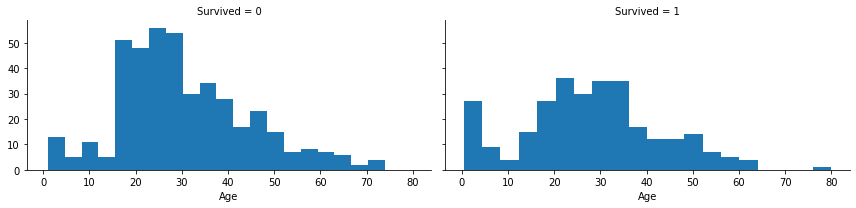

In [13]:
g = sns.FacetGrid(df_train, col='Survived', height=3, aspect=2)
g.map(plt.hist, 'Age', bins=20)

Infants (Age<=4) and passengers of 16-36 years old had a high survival rate.  
Large number of passengers of 16-32 years old did not survive.

We should include Age in our model training.

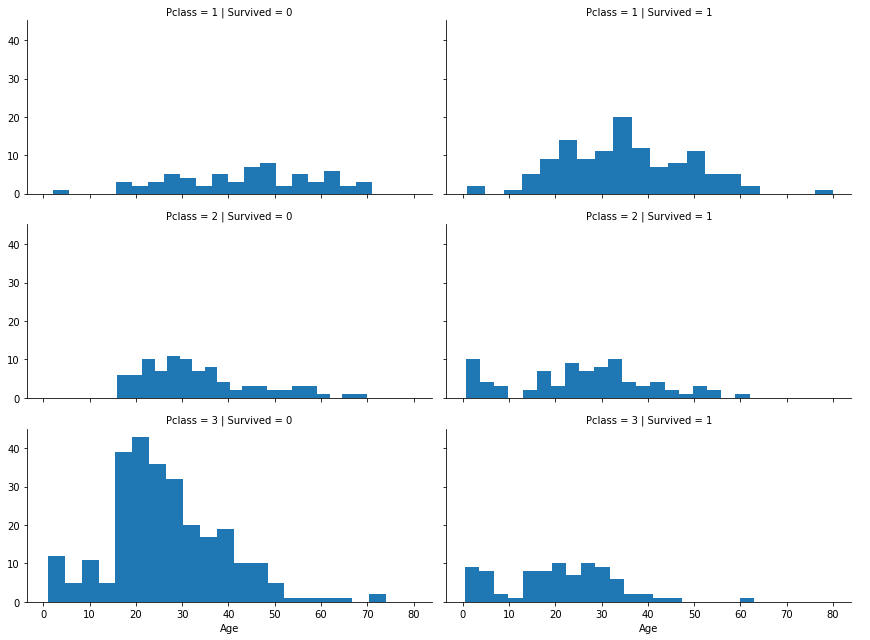

In [14]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

Pclass=3 has the largest number of passengers who did not survive.  
Infant passengers in Pclass=2 and Pclass=3 mostly survived.
Most passengers in Pclass=1 survived.

We should include Pclass in our model training.

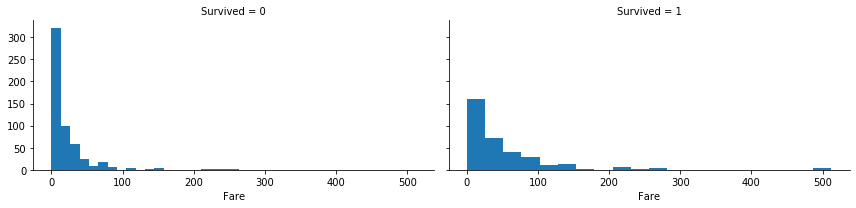

In [15]:
g = sns.FacetGrid(df_train, col='Survived', height=3, aspect=2)
g.map(plt.hist, 'Fare', bins=20)

We dropped Ticket feature from our analysis as there may not be a correlation between Ticket and survival.  
Cabin feature is dropped as it contains many null values both in training and test dataset.  
PassengerId may be dropped from training dataset as it does not contribute to Survival.  
Name feature is relatively non-standard, so maybe dropped.  

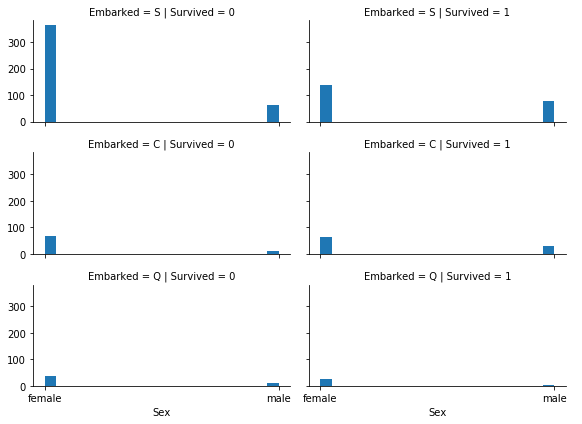

In [16]:
grid = sns.FacetGrid(df_train, col='Survived', row='Embarked', height=2, aspect=2)
grid.map(plt.hist, 'Sex', bins=20)
grid.add_legend()

D:\Maryna\dev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Maryna\dev\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


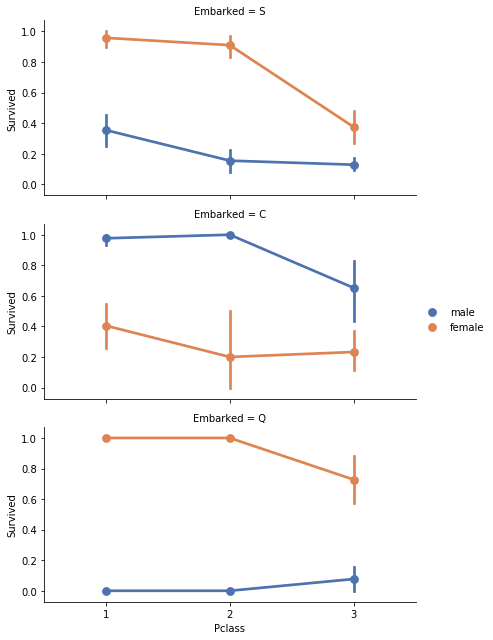

In [17]:
grid = sns.FacetGrid(df_train, row='Embarked', height=3, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Female passengers had better survival rate than males for Embarked=S and Embarked=Q. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.  

We include Sex feature for model training.  

We complete and add Embarked feature for model training.

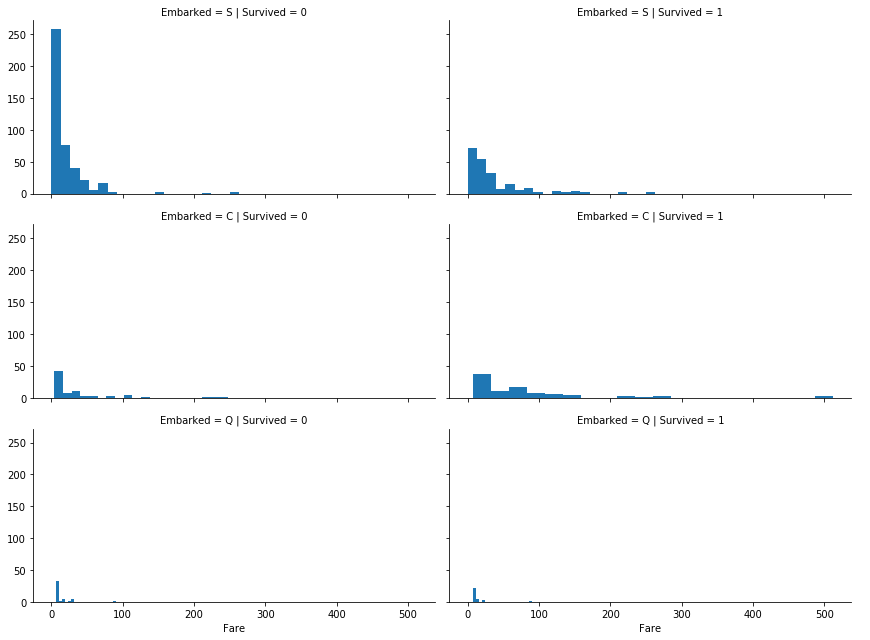

In [18]:
grid = sns.FacetGrid(df_train, col='Survived', row='Embarked', height=3, aspect=2)
grid.map(plt.hist, 'Fare', bins=20)
grid.add_legend()

For Embarked=S and Embarked=C we have higher survival rate for higher fare.

We include Fare and Embarked in model training.

### Correcting data

In [19]:
df_train = df_train.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
combine=[df_train, df_test]

#### Creating new feature extracting from existing

We extract Title feature using regular expressions. The expand=False flag returns a DataFrame.

In [20]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [22]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
pd.crosstab(df_test['Title'], df_test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Jonkheer','Lady',\
 	 'Major', 'Rev', 'Sir', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Other,0.312500


We can convert the categorical titles to numerical.

In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr":5, "Other": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
df_train=df_train.drop('Name', axis=1)
df_test=df_test.drop('Name', axis=1)
combine=[df_train,df_test]
df_train.shape, df_test.shape

((891, 9), (418, 8))

In [27]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [28]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,3
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3


In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


Now we should estimate and complete features with missing or null values. We will first do this for the Age feature.  

We can consider three methods to complete a numerical continuous feature.  

- A simple way is to generate random numbers between mean and standard deviation.  

- More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

- Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.  

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will use method 2.

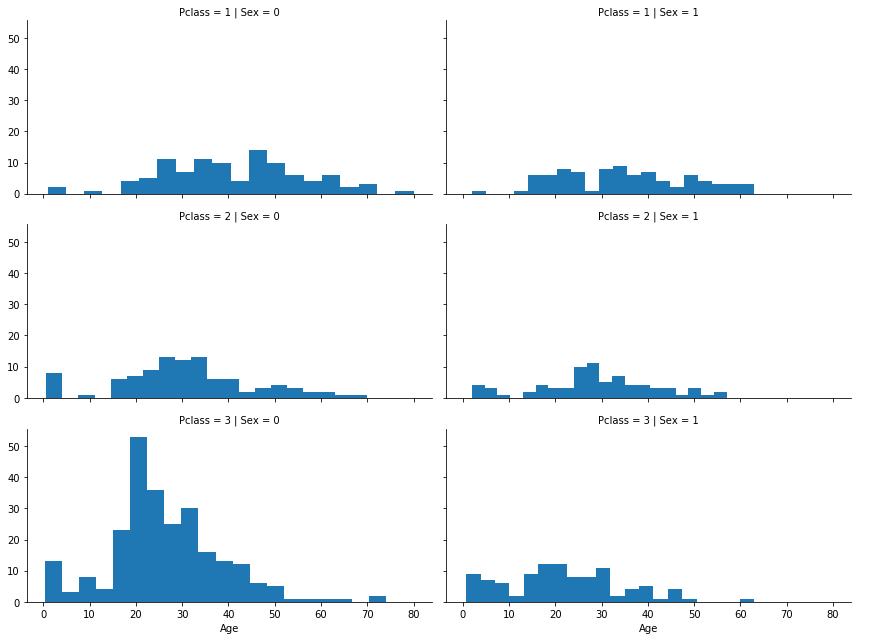

In [30]:
grid = sns.FacetGrid(df_train, row='Pclass', col='Sex', height=3, aspect=2)
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend()

In [32]:
guess_ages = np.zeros((2,3))

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [33]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            df_guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = df_guess.mean()
            # age_std = df_guess.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = df_guess.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Now we can create Age bands and determine correlations with Survived.

In [34]:
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Now we replace Age with numbers based on these bands.

In [35]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [36]:
df_train = df_train.drop(['AgeBand'], axis=1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [37]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['SibSp'] == 0) & (dataset['Parch'] == 0), 'IsAlone'] = 1

df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


We notice than people who travelled alone had a lower survival rate.  
We can also create an artificial feature combining Pclass and Age.

In [38]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age']* dataset['Pclass']

df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,1,0,7.2500,S,1,0,3
1,1,1,1,2,1,0,71.2833,C,3,0,2
2,1,3,1,1,0,0,7.9250,S,2,1,3
3,1,1,1,2,1,0,53.1000,S,3,0,2
4,0,3,0,2,0,0,8.0500,S,1,1,6
5,0,3,0,1,0,0,8.4583,Q,1,1,3
6,0,1,0,3,0,0,51.8625,S,1,1,3
7,0,3,0,0,3,1,21.0750,S,4,0,0
8,1,3,1,1,0,2,11.1333,S,3,0,3
9,1,2,1,0,1,0,30.0708,C,3,0,0


#### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common value.

In [39]:
freq_port = df_train['Embarked'].dropna().mode()[0]
freq_port

'S'

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


#### Converting categorical feature to numeric

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,1,0,7.2500,0,1,0,3
1,1,1,1,2,1,0,71.2833,1,3,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,3
3,1,1,1,2,1,0,53.1000,0,3,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,6


#### Quick completing and converting a numeric feature

We can now complete the Fare feature for a missing value in the test dataset using the mode.

In [42]:
df_test['Fare'].fillna(df_test['Fare'].dropna().mode()[0], inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,0,7.8292,2,1,1,6
1,3,1,2,1,0,7.0000,0,3,0,6
2,2,0,3,0,0,9.6875,2,1,1,6
3,3,0,1,0,0,8.6625,0,1,1,3
4,3,1,1,1,1,12.2875,0,3,0,3


In [43]:
df_train['FareBand'] = pd.cut(df_train['Fare'], 3)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 170.776]",0.376579
1,"(170.776, 341.553]",0.647059
2,"(341.553, 512.329]",1.000000


In [44]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 170.776, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 170.776) & (dataset['Fare'] <= 341.553), 'Fare'] = 1
    dataset.loc[dataset['Fare'] > 341.553, 'Fare']   = 2
    dataset['Fare'] = dataset['Fare'].astype(int)

df_train = df_train.drop(['FareBand'], axis=1)
combine = [df_train, df_test]
    
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,1,0,0,0,1,0,3
1,1,1,1,2,1,0,0,1,3,0,2
2,1,3,1,1,0,0,0,0,2,1,3
3,1,1,1,2,1,0,0,0,3,0,2
4,0,3,0,2,0,0,0,0,1,1,6
5,0,3,0,1,0,0,0,2,1,1,3
6,0,1,0,3,0,0,0,0,1,1,3
7,0,3,0,0,3,1,0,0,4,0,0
8,1,3,1,1,0,2,0,0,3,0,3
9,1,2,1,0,1,0,0,1,3,0,0


In [45]:
df_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,0,0,2,1,1,6
1,3,1,2,1,0,0,0,3,0,6
2,2,0,3,0,0,0,2,1,1,6
3,3,0,1,0,0,0,0,1,1,3
4,3,1,1,1,1,0,0,3,0,3
5,3,0,0,0,0,0,0,1,1,0
6,3,1,1,0,0,0,2,2,1,3
7,2,0,1,1,1,0,0,1,0,2
8,3,1,1,0,0,0,1,3,1,3
9,3,0,1,2,0,0,0,1,0,3


In [46]:
df_train = df_train.drop(['Parch', 'SibSp'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp'], axis=1)
combine = [df_train, df_test]

df_train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6
5,0,3,0,1,0,2,1,1,3
6,0,1,0,3,0,0,1,1,3
7,0,3,0,0,0,0,4,0,0
8,1,3,1,1,0,0,3,0,3
9,1,2,1,0,0,1,3,0,0


In [47]:
df_test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,0,2,1,1,6
3,3,0,1,0,0,1,1,3
4,3,1,1,0,0,3,0,3
5,3,0,0,0,0,1,1,0
6,3,1,1,0,2,2,1,3
7,2,0,1,0,0,1,0,2
8,3,1,1,0,1,3,1,3
9,3,0,1,0,0,1,0,3


### Model, predict and solve

Our problem is a classification and regression problem. We will consider the following models:

- Logistic Regression
- k-Nearest Neighbors
- Support Vector Machines
- Gaussian Naive Bayes
- Decision Tree
- Random Forrest

In [48]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

#### Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function. 

In [49]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
score_log = round(logreg.score(X_train, Y_train) * 100, 2)
score_log

81.37

#### k-Nearest Neighbors (KNN)

The sample is assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).

In [50]:
# k-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
score_knn = round(knn.score(X_train, Y_train) * 100, 2)
score_knn

83.28

#### Support Vector Machines

Support Vector Machines is a supervised learning model. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. 

In [51]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
score_svc = round(svc.score(X_train, Y_train) * 100, 2)
score_svc

79.69

#### Gaussian Naive Bayes

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 

In [52]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
score_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
score_gaussian

79.24

#### Decision Tree

In [53]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
score_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
score_decision_tree

84.51

#### Random Forest

In [54]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
score_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
score_random_forest

84.51

### Model evaluation

We can now rank our models to choose the best one for our problem.

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [score_svc, score_knn, score_log, 
              score_random_forest, score_gaussian, score_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.51
5,Decision Tree,84.51
1,KNN,83.28
2,Logistic Regression,81.37
0,Support Vector Machines,79.69
4,Naive Bayes,79.24
